In [1]:
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from time import time
import re
import spacy
import markovify
import warnings
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")

# Get data and images I need


In [2]:
%cd C:\Users\jonat\Desktop\NLP

C:\Users\jonat\Desktop\NLP


In [3]:
img = np.array(Image.open("Trump.png"))
df = pd.read_csv(r'realdonaldtrump.csv')

# Gotta get some sweet functions to make my life easier

In [4]:
def preprocess(docs):
  lemmatizer = WordNetLemmatizer()
  stemmer = SnowballStemmer('english')
  preprocessed = []

  for doc in docs:


    tokenized = word_tokenize(doc)
    # list comprehension
    # cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
    #             for token in tokenized 
    #             if token.lower() not in stopwords.words('english') 
    #             if token.isalpha()]

    cleaned = []
    for token in tokenized:
      if token.lower() not in stopwords.words('english') and token.isalpha():
        lemmatized = lemmatizer.lemmatize(token.lower())
        stemmed = stemmer.stem(lemmatized)
        cleaned.append(stemmed)
    


    # combine the list into a big string
    untokenized = ' '.join(cleaned)
    preprocessed.append(untokenized)

  return preprocessed
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [token.lower() for token in tokens 
             if not token.lower() in stopwords.words('english')
             if not token in string.punctuation]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    
    spacy_doc = nlp(doc)
    remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 
              'ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    
    stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
             words_sent, char_word, lex_div]

    return stats
def word_cloud(text, colormap='tab10', background_color='white'):
    cloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS,
                      colormap=colormap, 
                      background_color=background_color).generate(text)
    
    plt.figure(figsize=(12,10))
    plt.imshow(cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


In [5]:
#Getting only the tweets
tweets = list(df['content'])
type(tweets)


list

In [6]:
#Making a string of tweets and removing any hyperlinks as well as mentions of twitter on twitter
maga = ""
for tweet in tweets:
    maga+=tweet
maga = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', maga)
maga = maga.replace("twitter", "")

In [7]:
nlp = spacy.load('en_core_web_sm')
#Don't want to exceed the parser limit, this guy really does tweet a lot. My gosh!
maga_doc = nlp(maga[:(1000000-1)])


In [8]:
maga_sents = " ".join([sent.text for sent in maga_doc.sents if len(sent.text) > 1])
maga_sents

'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman:   - Very funny!New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way :  persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. TrumpMiss USA Tara Conner will not be fired - "I\'ve always been a believer in second chances." says Donald TrumpListen to an interview with Donald Trump discussing his new book, Think Like A Champion:  for wholeness and keep your sense of wonder intact." --Donald J. Trump  the "Think Like A Champion" signed book and keychain contest:  the achiever achieves, it\'s not a plateau, it’s a beginning." --Donald J. Trump  be afraid of being unique - it\'s like being afraid of your

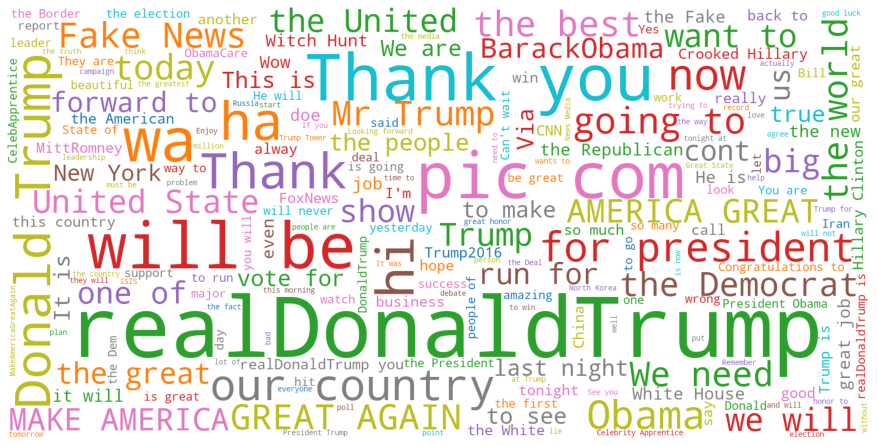

In [9]:
#Make a pretty word cloud for presentation sake since it looks cool
word_cloud(maga)


In [10]:
tweets[0]

'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!'

In [11]:
#Due to this length, I'm only going to use 10k tweets rather than all of them. I want to not spend a ton of time processing this. 
#Using spark/hadoop might help with this, but that is something for another day
len(tweets)

42295

In [12]:
#This is 10k tweets. I'm pretty sure that's more than enough data
preprocessed = preprocess(tweets[32294:42294])

# Do a few types of vectorization to make vectors for the spectors

In [13]:
#Count Vectorize
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(preprocessed)

count = pd.DataFrame(vectors.toarray(), 
                     columns=vectorizer.get_feature_names())
count.head(10)

,aaa,abandon,abba,abbott,abc,abcnew,abcworldnew,abduct,abdul,abdullah,...,گوید,یا,یابند,इस,एक,और,कर,यह,हम,हर
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#One hot 
vectorizer = CountVectorizer(binary=True)
vectors = vectorizer.fit_transform(preprocessed)

one_hot = pd.DataFrame(vectors.toarray(), 
                     columns=vectorizer.get_feature_names())
one_hot.head(10)

,aaa,abandon,abba,abbott,abc,abcnew,abcworldnew,abduct,abdul,abdullah,...,گوید,یا,یابند,इस,एक,और,कर,यह,हम,हर
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#TF-IDF 
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed)

tfidf = pd.DataFrame(vectors.toarray(), 
                     columns=vectorizer.get_feature_names())

tfidf.describe()

,aaa,abandon,abba,abbott,abc,abcnew,abcworldnew,abduct,abdul,abdullah,...,گوید,یا,یابند,इस,एक,और,कर,यह,हम,हर
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.000039,0.000380,0.000043,0.000029,0.000699,0.000058,0.000030,0.000040,0.000037,0.000043,...,0.000020,0.000029,0.000011,0.000028,0.000028,0.000263,0.000028,0.000026,0.000146,0.000028
std,0.003857,0.010836,0.004325,0.002899,0.015270,0.004078,0.002975,0.003954,0.003707,0.004280,...,0.002034,0.002044,0.001095,0.002802,0.002802,0.015260,0.002802,0.002603,0.011002,0.002802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.385696,0.446319,0.432537,0.289918,0.526086,0.290607,0.297518,0.395354,0.370679,0.428046,...,0.203438,0.159375,0.109533,0.280201,0.280201,0.965517,0.280201,0.260340,1.000000,0.280201


# Honestly, given the task, this step doesn't seem as useful.

### Were I using this text to predict something, then I'm using different models(Logreg, RandomForestClassifier, GBC) would show the differences between these vectorizing methods. BoW is a good general method, tf-idf gives words wights so it's better with distinctive words whereas word-vec produces a vector per word(rather than BoW wordcount)

# Now let's see if I can make sentences that can seem like something Trump wrote!

In [18]:
trump_generator = markovify.Text(maga_sents, state_size = 3)

In [33]:
for i in range(5):
    print(trump_generator.make_sentence())
    print("---------------------------------------")

Then how come gasoline is hitting record high prices?So far @ MittRomney is right, the economy has not been fixed under Obama.
---------------------------------------
I just retained Sir Nick Faldo to be the best present you give!My @ FoxNews interview from yesterday with # Apprentice Andy on @ AmericaNowRadio with Andy Dean.
---------------------------------------
@ MittRomney did a great job @ Cadillac has done.
---------------------------------------
Tune in!My @ CNBCClosingBell interview discussing America's financial uncertainty due to @ BarackObama and his family travel separately to Martha's Vineyard?
---------------------------------------
None
---------------------------------------


# If i need to revise/add things, let me know. Seeing the text generation alone was hilarious and fooled my friends into thinking it was real

In [34]:
class POSifiedText(markovify.Text):
    
    def word_split(self, sentence):
        return ["::".join((word.orth_, word.pos_)) for word in nlp(sentence)]

    def word_join(self, words):
        sentence = " ".join(word.split("::")[0] for word in words)
        return sentence

In [42]:
pos_trump_generator = POSifiedText(maga_sents, state_size = 3)

In [46]:
# Print five randomly-generated sentences
for i in range(4):
    print(pos_trump_generator.make_sentence())
    print("----------------")

@ gretawire interview from last night 's episode of The Celebrity Apprentice ...
----------------
# CelebApprenticeIt appears that @ THEGaryBusey is a scene stealer without trying .
----------------
Met @ newtgingrich at Trump Tower where the door was open .
----------------
I 'll be making a big mistake when she married him .
----------------
